# Lecture 5

 Fall 2023

A demonstration of advanced `pandas` syntax to accompany Lecture 5.

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px

## More on `Groupby`

### Slido Exercise

Try to predict the results of the `groupby` operation shown. The answer is below the image.

<img src="/content/drive/MyDrive/groupby.png" alt="Image" width="600">

The top ?? will be "hi", the second ?? will be "tx", and the third ?? will be "sd".

In [3]:
# Form a data frame using dictionary
# Answer Here
ds = pd.DataFrame(dict(x=[3, 1, 4, 1, 5, 9, 2, 5, 6],
                      y=['ak', 'tx', 'fl', 'hi', 'mi', 'ak', 'ca', 'sd', 'nc']),
                      index=list('ABCABCACB') )
ds

,x,y
A,3,ak
B,1,tx
C,4,fl
A,1,hi
B,5,mi
C,9,ak
A,2,ca
C,5,sd
B,6,nc


In [3]:
#Use groupby on index and get max of each group
ds.groupby(ds.index).max()

,x,y
A,3,hi
B,6,tx
C,9,sd


### Loading `babynames` Dataset

In [25]:
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "/content/drive/MyDrive/data/babynamesbystate.zip"
if not os.path.exists(local_filename): # If the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'STATE.CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.tail(10)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/data/babynamesbystate.zip'

In [19]:

field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
data = pd.read_csv('babynamesbystate\STATE.CA.TXT', header=None, names=field_names)

### Case Study: Name "Popularity"

In this exercise, let's find the name with sex "F" that has dropped most in popularity since its peak usage in California. We'll start by filtering `babynames` to only include names corresponding to sex "F".

In [20]:
#Answer Here

female_data = data[data["Sex"]=="F"]


maximum = female_data.groupby("Name")["Count"].max()


minimum = female_data.groupby("Name")["Count"].last()

val = (maximum - minimum) / maximum * 100

name_pop_drop = val.idxmax()
print("The name is whose popularity has dropped in recent year is :: ",name_pop_drop)

The name is whose popularity has dropped in recent year is ::  Debra


### Slido Exercise

Is there a row where `Year` is not equal to 1?

In [21]:
# Find Unique values in the Year column 
data["Year"].unique()

array([1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022], dtype=int64)

In [22]:
# Dropping the Year column
data.drop(columns="Year")

,State,Sex,Name,Count
0,CA,F,Mary,295
1,CA,F,Helen,239
2,CA,F,Dorothy,220
3,CA,F,Margaret,163
4,CA,F,Frances,134
...,...,...,...,...
407423,CA,M,Zayvier,5
407424,CA,M,Zia,5
407425,CA,M,Zora,5
407426,CA,M,Zuriel,5


In [23]:
# Rename "Count" to "Count RTP" for clarity
data.rename(columns={"Count": "Count RTP"},inplace=True)

In [24]:
# What name has fallen the most in popularity?
name_pop_drop

'Debra'

We can visualize the decrease in the popularity of the name "Debra:"

In [25]:
def plot_name(*names):
    fig = px.line(female_data[female_data["Name"].isin(names)],
                  x = "Year", y = "Count", color="Name",
                  title=f"Popularity for: {names}")
    fig.update_layout(font_size = 18,
                  width=1000,
                  height=400)
    return fig

plot_name("Debra")

In [26]:
# Find the 10 names that have decreased the most in popularity
a = female_data["Count"].sort_values(ascending=False).head(10).index

top = female_data.loc[a,["Name"]]

top_names = top["Name"].tolist()
top_names


px.line(female_data[female_data["Name"].isin(top_names)], x = "Year", y = "Count", color = "Name")


In [12]:
plot_name(*top_names)

For fun, try plotting your name or your friends' names.

### Slido Exercise

Given the example below on `babynames` dataset, write code to compute the total number of babies with each name in California using with and without agg.

In [28]:
# code here

# With agg
with_agg = data[data['State'] == 'CA'].groupby('Name').agg({'Count RTP': 'sum'})

# Without agg
no_agg = data[data['State'] == 'CA'].groupby('Name')['Count RTP'].sum()

# Print the results
print("Total number of babies with each name in California using agg:")
print(with_agg)

print("\nTotal number of babies with each name in California without agg:")
print(no_agg)


Total number of babies with each name in California using agg:
         Count RTP
Name              
Aadan           18
Aadarsh          6
Aaden          647
Aadhav          27
Aadhini          6
...            ...
Zymir            5
Zyon           133
Zyra           103
Zyrah           21
Zyrus            5

[20437 rows x 1 columns]

Total number of babies with each name in California without agg:
Name
Aadan       18
Aadarsh      6
Aaden      647
Aadhav      27
Aadhini      6
          ... 
Zymir        5
Zyon       133
Zyra       103
Zyrah       21
Zyrus        5
Name: Count RTP, Length: 20437, dtype: int64


### Slido Exercise

Write code to compute the total number of babies born each year in California.

In [31]:

# Filter the data for California
california_data = data[data['State'] == 'CA']

# Group the filtered data by the 'Year' column and sum the 'Count' column
total_ = california_data.groupby('Year')['Count RTP'].sum()

# Print the results
print("Total number of babies born each year in California:")
print(total_)


Total number of babies born each year in California:
Year
1910      9163
1911      9983
1912     17946
1913     22094
1914     26926
         ...  
2018    395436
2019    386996
2020    362882
2021    362582
2022    360023
Name: Count RTP, Length: 113, dtype: int64


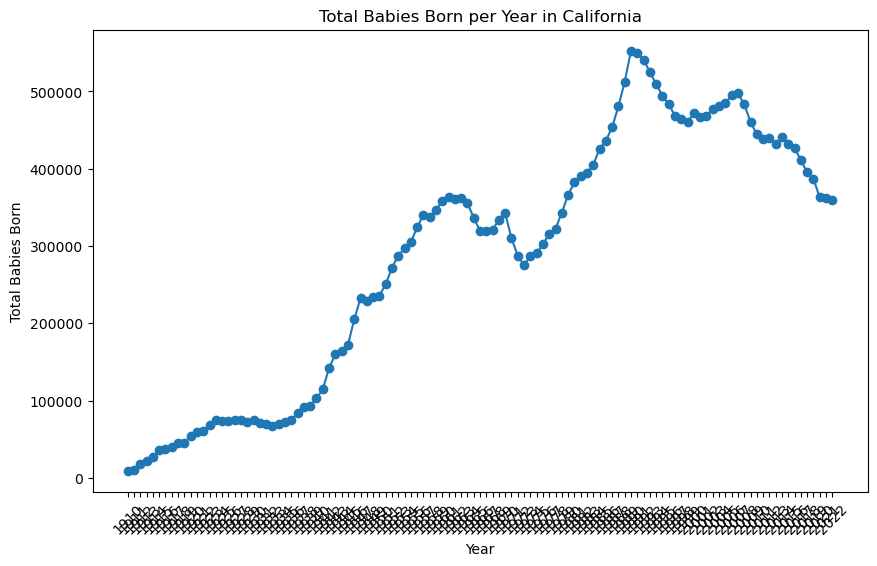

In [32]:
# Plotting baby counts per year
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(total_.index, total_.values, marker='o', linestyle='-')
plt.title('Total Babies Born per Year in California')
plt.xlabel('Year')
plt.ylabel('Total Babies Born')
plt.xticks(total_.index, rotation=45)
plt.show()


### `groupby.size` and `groupby.count()`

In [33]:
df = pd.DataFrame({'letter':['A', 'A', 'B', 'C', 'C', 'C'],
                   'num':[1, 2, 3, 4, np.NaN, 4],
                   'state':[np.NaN, 'tx', 'fl', 'hi', np.NaN, 'ak']})
df

,letter,num,state
0,A,1.0,NaN
1,A,2.0,tx
2,B,3.0,fl
3,C,4.0,hi
4,C,NaN,NaN
5,C,4.0,ak


`groupby.size()` returns a `Series`, indexed by the `letter`s that we grouped by, with values denoting the number of rows in each group/sub-DataFrame. It does not care about missing (`NaN`) values.

In [34]:
# Use groupby with size()
df.groupby("letter")["num"].size()

letter
A    2
B    1
C    3
Name: num, dtype: int64

`groupby.count()` returns a `DataFrame`, indexed by the `letter`s that we grouped by. Each column represents the number of non-missing values for that `letter`.

In [35]:
# Use groupby with count()
df.groupby("letter")["num"].count().reset_index()

,letter,num
0,A,2
1,B,1
2,C,2


You might recall `value_counts()` function we talked about last week. What's the difference?

In [36]:
# Use value_count() on DataFrame described above
df.value_counts()
#it will count the frequency of each unique value

letter  num  state
A       2.0  tx       1
B       3.0  fl       1
C       4.0  ak       1
             hi       1
Name: count, dtype: int64

Turns out `value_counts()` does something similar to `groupby.size()`, except that it also sorts the resulting `Series` in descending order.

## Filtering by Group

In [37]:
# Let's read the elections dataset

edata = pd.read_csv("H:\Machine Learning\Excel files\elections 1.csv")
edata.head()

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


Let's keep only the elections years where the maximum vote share `%` is less than 45%.

In [38]:
# use filter function
edata = edata[edata["%"]<45]
edata.head()

,Year,Candidate,Party,Popular vote,Result,%
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
5,1832,Henry Clay,National Republican,484205,loss,37.603628
6,1832,William Wirt,Anti-Masonic,100715,loss,7.821583
7,1836,Hugh Lawson White,Whig,146109,loss,10.005985


### `groupby` Puzzle

Assume that we want to know the best election by each party.

In [39]:
import numpy as np
import pandas as pd
data = pd.read_csv("H:\Machine Learning\Excel files\elections.csv")
data.head(3)

,Candidate,Party,%,Year,Result
0,Reagan,Republican,50.7,1980,win
1,Carter,Democratic,41.0,1980,loss
2,Anderson,Independent,6.6,1980,loss


#### Attempt #1

In [40]:
len(data["Party"].unique())

3

In [41]:


dfa = data.groupby("Party")["%"].idxmax()

ds = data.loc[dfa,:]

ds.head(3)


,Candidate,Party,%,Year,Result
17,Obama,Democratic,52.9,2008,win
9,Perot,Independent,18.9,1992,loss
3,Reagan,Republican,58.8,1984,win


#### Attempt #2

Next, we'll write code that properly returns _the best result by each party_. That is, each row should show the Year, Candidate, Popular Vote, Result, and % for the election in which that party saw its best results (rather than mixing them as in the example above). Here's what the first rows of the correct output should look like:

![parties.png](attachment:ab21f8de-ad29-46c2-bea7-e9aea9c40e3e.png)

In [42]:
ds

,Candidate,Party,%,Year,Result
17,Obama,Democratic,52.9,2008,win
9,Perot,Independent,18.9,1992,loss
3,Reagan,Republican,58.8,1984,win


#### Alternative Solutions

You'll soon discover that with Pandas rich tool set, there's typically more than one way to get to the same answer. Each approach has different tradeoffs in terms of readability, performance, memory consumption, complexity, and more. It will take some experience for you to develop a sense of which approach is better for each problem, but you should, in general, try to think if you can at least envision a different solution to a given problem, especially if you find your current solution to be particularly convoluted or hard to read.

Here are a couple of other ways of obtaining the same result (in each case, we only show the top part with `head()`). The first approach uses `groupby` but finds the location of the maximum value via the `idxmax()` method (look up its documentation!).  We then index and sort by `Party` to match the requested formatting:

In [54]:
# Use idxmax function
id_data = data.groupby("Party")["%"].idxmax()
id_data


Party
Democratic     17
Independent     9
Republican      3
Name: %, dtype: int64

In [55]:
# This is the computational part, Extract DataFrame based on above mentioned condition

# Apply sort_index to match the formatting above
id_data.sort_index()

Party
Democratic     17
Independent     9
Republican      3
Name: %, dtype: int64

Another approach is listed below. And this one doesn't even use `groupby`!

This approach instead uses the `drop_duplicates` method to keep only the last occurrence of of each party after having sorted by "%", which is the best performance.

In [56]:
# code here
data.sort_values("%").drop_duplicates(["Party"], keep="last")


,Candidate,Party,%,Year,Result
9,Perot,Independent,18.9,1992,loss
17,Obama,Democratic,52.9,2008,win
3,Reagan,Republican,58.8,1984,win


*Challenge:* See if you can find yet another approach that still gives the same answer.

### `DataFrameGroupBy` Objects

The result of `groupby` is not a `DataFrame` or a list of `DataFrame`s. It is instead a special type called a `DataFrameGroupBy`.

In [58]:
grouped_by_party = data.groupby("Party")
type(grouped_by_party)

pandas.core.groupby.generic.DataFrameGroupBy

`GroupBy` objects are structured like dictionaries. In fact, we can actually see the dictionaries with the following code:

In [59]:
# visualize groups

grouped_by_party.groups

{'Democratic': [1, 4, 6, 7, 10, 13, 15, 17, 19, 21], 'Independent': [2, 9, 12], 'Republican': [0, 3, 5, 8, 11, 14, 16, 18, 20, 22]}

The `key`s of the dictionary are the groups (in this case, `Party`), and the `value`s are the **indices** of rows belonging to that group. We can access a particular sub-`DataFrame` using `get_group`:

In [60]:
# code here


grouped_by_party.get_group("Independent")

,Candidate,Party,%,Year,Result
2,Anderson,Independent,6.6,1980,loss
9,Perot,Independent,18.9,1992,loss
12,Perot,Independent,8.4,1996,loss


---